# Visualizing Topic Assignments

# Imports

In [1]:
import numpy as np
import pandas as pd
import plotly.plotly as py
from plotly.graph_objs import *

# Load

In [2]:
df = pd.read_csv('../../results/topic_count_10.csv')

In [3]:
df.sort(['department_name', 'topic'], inplace=True)

# Transform

## Percentage Values

In [4]:
totals = pd.DataFrame({'total' : df.groupby('department_name')['count'].sum()}).reset_index()

In [5]:
df = pd.merge(df, totals, on='department_name')

In [6]:
df['percentage'] = df['count'] / df['total']

## Matrix Form

In [7]:
matrix = df.pivot(index='words', columns='department_name', values='percentage')

In [8]:
matrix

department_name,alpdc plant expenditures proj,azcss general admin,cchem instr ops,cchem res research,cdcdn bas mat mgmt stores ops,cdcdn chem engineering svc,ceeeg res research,eeres microfab lab,eeres res central,eeres res projects,...,iqbbb research,jbssl ssl contracts grants,mdnst ns research grants,mepmb mb res grants,ooebi depolymerization,ooebi support centers,physi ss atomic molecular,physi ss condensed matter expe,ukhds central housekeeping,ukhds central maintenance
words,,,,,,,,,,,,,,,,,,,,,
"aldrich, sigma, technologies, life, england, biolabs, cell, vwr, international, reagent",NaN,0.004376,0.134615,0.326571,0.085324,NaN,0.251889,0.064,0.259615,0.109890,...,0.400000,0.013453,0.393881,0.250000,0.504918,0.163265,0.021053,0.069767,NaN,NaN
"dell, tips, lp, marketing, tip, scientific, rainin, digikey, pipet, usa",0.08,0.122538,0.050000,0.034142,0.027304,NaN,0.105793,0.040,0.168269,0.109890,...,0.077437,0.542601,0.065010,0.122951,0.032787,0.102041,0.378947,0.139535,0.161850,0.004464
"grainger, type, size, length, material, steel, head, width, dia, finish",0.12,0.019694,0.038462,0.016329,0.058020,0.813559,0.032746,0.208,0.009615,0.043956,...,0.007799,0.022422,0.007648,0.012295,0.003279,0.004082,0.084211,0.116279,0.057803,0.750000
"hp, max, office, cartridge, toner, packard, hewlett, black, yield, color",0.04,0.087527,0.076923,0.017318,0.030717,0.050847,0.030227,0.032,0.067308,0.043956,...,0.023955,0.076233,0.011472,0.004098,0.003279,0.036735,0.010526,0.040698,0.069364,0.040179
"laboratories, praxair, bio, spectrum, rad, chemicals, thorlabs, distribution, supply, sciences",0.08,0.024070,0.069231,0.117763,0.017065,0.118644,0.261965,0.028,0.216346,0.274725,...,0.081894,0.107623,0.099426,0.061475,0.101639,0.089796,0.400000,0.296512,0.063584,0.040179
"max, office, black, color, sanford, ink, size, point, fine, blue",0.16,0.157549,0.038462,0.021277,0.088737,NaN,0.015113,0.024,0.014423,0.021978,...,0.026184,0.031390,0.034417,0.057377,0.013115,0.012245,0.021053,0.011628,0.011561,0.071429
"office, max, color, size, label, 3m, private, white, tape, box",0.32,0.433260,0.065385,0.024245,0.122867,NaN,0.022670,0.076,0.067308,0.076923,...,0.017270,0.076233,0.007648,0.036885,NaN,0.028571,NaN,0.046512,0.046243,0.071429
"paper, office, white, max, boise, lb, cdw, color, carton, clark",0.20,0.146608,0.053846,0.023256,0.023891,NaN,0.045340,0.024,0.062500,0.131868,...,0.029526,0.071749,0.028681,0.020492,0.003279,0.044898,0.063158,0.034884,0.456647,0.008929
"scientific, fisher, thermo, chemical, glass, cs, bottle, cas, filter, fisherbrand",NaN,0.002188,0.353846,0.326076,0.389078,NaN,0.151134,0.136,0.072115,0.109890,...,0.171588,0.049327,0.187380,0.213115,0.288525,0.269388,0.010526,0.139535,0.005780,0.004464


In [9]:
matrix = matrix.fillna(0)

In [10]:
matrix_vals = np.array(matrix)

## Topics

In [11]:
topics = df.words.unique().tolist()

## Departments

In [12]:
depts = matrix.columns

# Heat Map

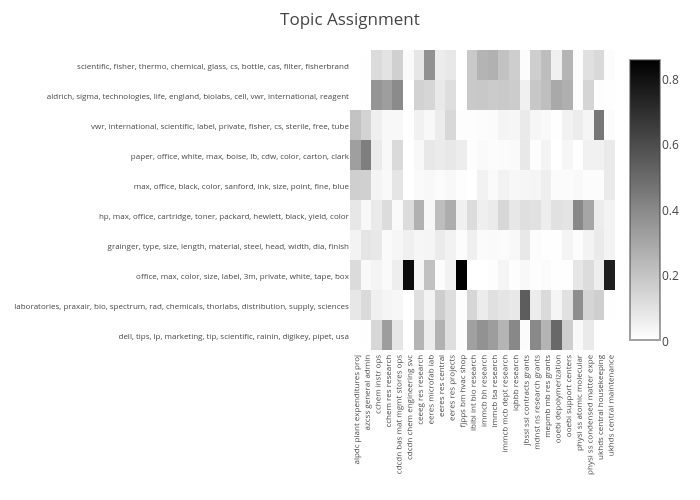

In [13]:
data = Data([
    Heatmap(
        z=matrix_vals,
        y=topics,
        x=depts,
        colorscale='Greys',
        reversescale=True
    )
])

layout = Layout(
    title='Topic Assignment',
    xaxis=XAxis(
        titlefont=Font(
            size=10
        ),
        range=[-0.5, 14.5],
        type='category',
        autorange=True,
        showgrid=False,
        showline=False,
        autotick=False,
        showticklabels=True,
        ticklen=0,
        tickangle=-90,
        tickfont=Font(
            size=8
        )
    ),
    yaxis=YAxis(
        titlefont=Font(
            size=10
        ),
        range=[-0.5, 9.5],
        type='category',
        autorange=True,
        showticklabels=True,
        ticklen=0,
        tickangle=0,
        tickfont=Font(
            size=8
        )
    ),
    margin=Margin(
        l=350,
        r=0,
        b=150,
        t=50
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-heatmap')